Pre-Processing

https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset/data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 775M/775M [00:17<00:00, 45.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1


In [ ]:
import os
import numpy as np

data_path = '/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages'
categories =  os.listdir(data_path)
print(categories)

['Dog', 'Cat']


In [ ]:
labels = np.arange(len(categories))
print(labels)

[0 1]


In [ ]:
label_dict = dict(zip(categories, labels))
print(label_dict)

{'Dog': 0, 'Cat': 1}


In [ ]:
import cv2
img_size = 50

data = []
target = []
for category in categories:
    category_path = os.path.join(data_path, category)
    img_names = os.listdir(category_path)
    for img_name in img_names:
        img_path = os.path.join(category_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            target.append(label_dict[category])
        except Exception as e:
            print(img_path, e)

/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Dog/2688.jpg OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Dog/7459.jpg OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Dog/11675.jpg OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Dog/6238.jpg OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/root/.cache/ka

In [ ]:
data_new = np.array(data)
target_new = np.array(target)

In [ ]:
print(data_new.shape)
print(target_new.shape)

(24946, 50, 50)
(24946,)


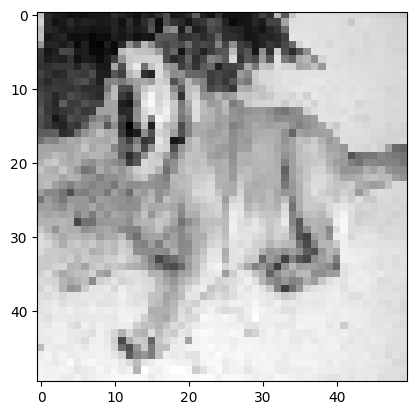

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(data_new[5], cmap='gray')
plt.show()

In [ ]:
target_new[5]

0

In [ ]:
print(data_new.shape)
print(data_new.shape[0], data_new.shape[1],data_new.shape[2])

(24946, 50, 50)
24946 50 50


In [ ]:
data_new=data_new.reshape(data_new.shape[0], data_new.shape[1],data_new.shape[2],1) # converting to 4D, CNN needs 4D input
print(data_new.shape)

(24946, 50, 50, 1)


In [ ]:
data_new=data_new/255 #normalizing/ Scaling
# from keras import np_utils
# target_new=np_utils.to_categorical(target_new)
from tensorflow.keras.utils import to_categorical
target_new = to_categorical(target_new)

In [ ]:
np.save('/content/drive/MyDrive/projects/Research Projects/Pet_Feeder/cat_and_dog_data', data_new)
np.save('/content/drive/MyDrive/projects/Research Projects/Pet_Feeder/cat_and_dog_target', target_new)

Tran Model

In [ ]:
import numpy as np
data=np.load('/content/drive/MyDrive/projects/Research Projects/Pet_Feeder/cat_and_dog_data.npy')
target=np.load('/content/drive/MyDrive/projects/Research Projects/Pet_Feeder/cat_and_dog_target.npy')

In [ ]:
print(data.shape)
print(target.shape)

(24946, 50, 50, 1)
(24946, 2)


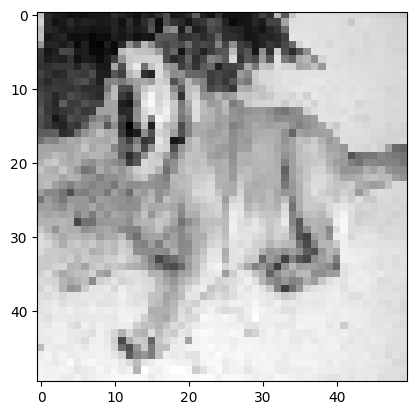

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(data[5], cmap='gray')

In [ ]:
target[5]

array([1., 0.])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model=Sequential()

# model.add(Conv2D(128, (3,3), input_shape=data.shape[1:],padding='same'))
model.add(Conv2D(64, (3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (5,5)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │       3,873,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,028,618 (15.37 MB)

 Trainable params: 4,028,618 (15.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau , CSVLogger

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=data.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
# model.add(Dense(1, activation='sigmoid'))
model.add(Dense(2,activation='softmax'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 22, 22, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 9, 9, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 524,418 (2.00 MB)

 Trainable params: 522,434 (1.99 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
# You can further split X_train and y_train into training and validation sets if needed
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 validation

# Check the shapes to confirm the split
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (14967, 50, 50, 1), (14967, 2)
Validation set: (4989, 50, 50, 1), (4989, 2)
Testing set: (4990, 50, 50, 1), (4990, 2)


In [ ]:
# history=model.fit(data,target,epochs=20, validation_split=0.2, batch_size=32)
# Train the model using the training and validation sets
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),  # Pass validation set
    batch_size=32
)

Epoch 1/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.5928 - loss: 0.7868 - val_accuracy: 0.5097 - val_loss: 0.8261
Epoch 2/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6909 - loss: 0.6013 - val_accuracy: 0.7332 - val_loss: 0.5331
Epoch 3/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7488 - loss: 0.5237 - val_accuracy: 0.6967 - val_loss: 0.5897
Epoch 4/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7823 - loss: 0.4684 - val_accuracy: 0.7416 - val_loss: 0.5300
Epoch 5/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7966 - loss: 0.4354 - val_accuracy: 0.6504 - val_loss: 0.7677
Epoch 6/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8049 - loss: 0.4149 - val_accuracy: 0.8092 - val_loss: 0.4244
Epoch 7/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8315 - loss: 0.3867 - val_accuracy: 0.8048 - val_loss: 0.4134
Epoch 8/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8316 - loss: 0.3731 - val_ac

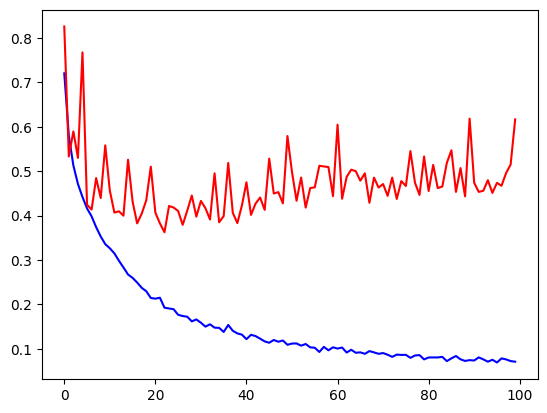

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

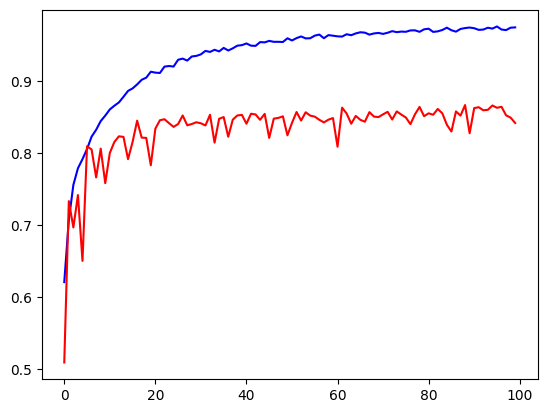

In [ ]:
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')

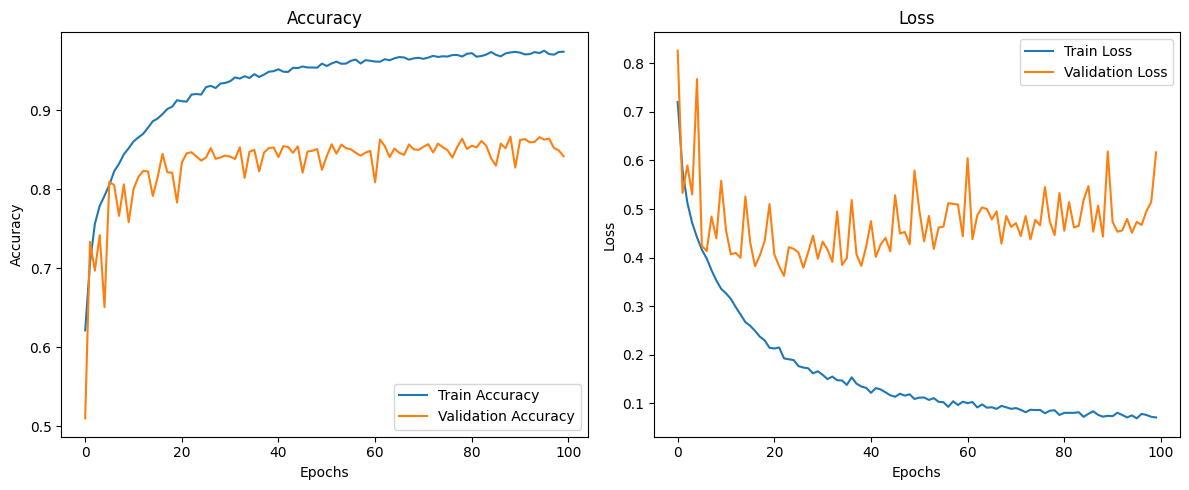

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8481 - loss: 0.6152
Test Loss: 0.5981556177139282
Test Accuracy: 0.8432865738868713


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


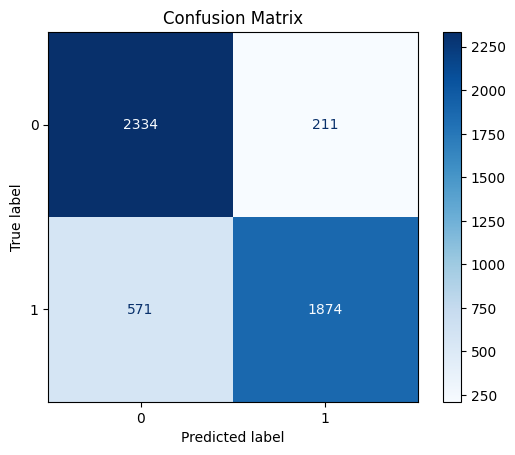

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Use argmax for multiclass classification
y_true_classes = np.argmax(y_test, axis=1)  # True labels (if one-hot encoded)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model in HDF5 format
model.save('/content/drive/MyDrive/projects/Research Projects/Pet_Feeder/model_v1.h5')

Test

In [ ]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model('/content/drive/MyDrive/projects/Research Projects/Pet_Feeder/model_v1.h5')

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

category_dict={0:'Dog', 1:'Cat'}

img_path='/content/drive/MyDrive/projects/Research Projects/Pet_Feeder/test/cat1.jpeg'
img=cv2.imread(img_path)

test_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_img=cv2.resize(test_img, (50, 50))
test_img=test_img/255.0
test_img=test_img.reshape(1, 50, 50, 1)

result=model.predict(test_img)
label=np.argmax(result,axis=1)[0]
print(result, label)
print(category_dict[label])

cv2_imshow(img)  # Use cv2_imshow() instead of cv2.imshow()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.000000e+00 4.760829e-36]] 0
Dog


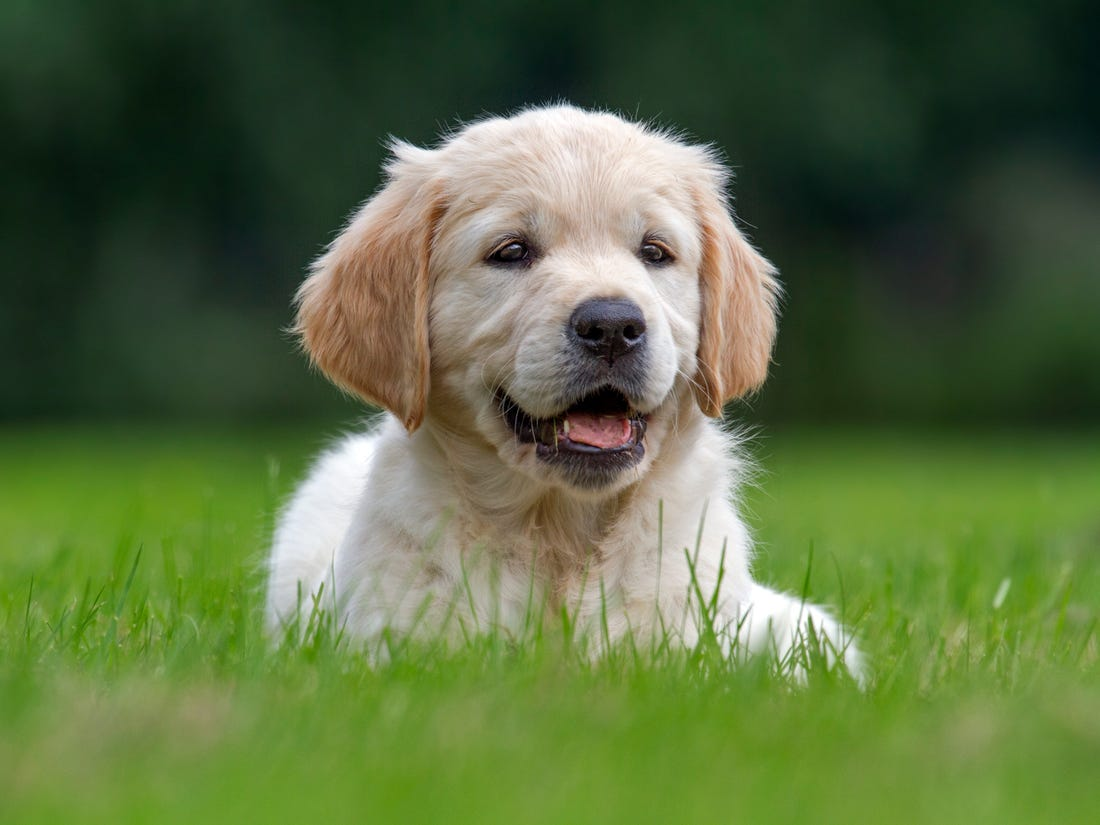

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

category_dict={0:'Dog', 1:'Cat'}

img_path='/content/drive/MyDrive/projects/Research Projects/Pet_Feeder/test/dog1.jpg'
img=cv2.imread(img_path)

test_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_img=cv2.resize(test_img, (50, 50))
test_img=test_img/255.0
test_img=test_img.reshape(1, 50, 50, 1)

result=model.predict(test_img)
label=np.argmax(result,axis=1)[0]
print(result, label)
print(category_dict[label])

cv2_imshow(img)  # Use cv2_imshow() instead of cv2.imshow()

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

category_dict={0:'Dog', 1:'Cat'}

img_path='/content/drive/MyDrive/projects/Research Projects/Pet_Feeder/test/dog2.jpg'
img=cv2.imread(img_path)

test_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_img=cv2.resize(test_img, (50, 50))
test_img=test_img/255.0
test_img=test_img.reshape(1, 50, 50, 1)

result=model.predict(test_img)
label=np.argmax(result,axis=1)[0]
print(result, label)
print(category_dict[label])

cv2_imshow(img)  # Use cv2_imshow() instead of cv2.imshow()

### Use ResNet50 for cat and dog classification

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 775M/775M [00:30<00:00, 26.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1


In [ ]:
import os
import numpy as np

data_path = '/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages'
categories =  os.listdir(data_path)
print(categories)

['Dog', 'Cat']


In [ ]:
labels = np.arange(len(categories))
print(labels)

[0 1]


In [ ]:
label_dict = dict(zip(categories, labels))
print(label_dict)

{'Dog': 0, 'Cat': 1}


In [ ]:
import cv2
img_size = 50

data = []
target = []
for category in categories:
    category_path = os.path.join(data_path, category)
    img_names = os.listdir(category_path)
    for img_name in img_names:
        img_path = os.path.join(category_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            target.append(label_dict[category])
        except Exception as e:
            print(img_path, e)

/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Dog/2688.jpg OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Dog/7459.jpg OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Dog/11675.jpg OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Dog/6238.jpg OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/root/.cache/ka

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load the ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 classes: cats and dogs

In [ ]:
# Final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,112,770 (91.98 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=30
)

train_data = train_datagen.flow_from_directory(
    '/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 24998 images belonging to 2 classes.


In [ ]:
model.fit(train_data, epochs=10, steps_per_epoch=len(train_data))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 30/782 ━━━━━━━━━━━━━━━━━━━━ 5:06 408ms/step - accuracy: 0.5336 - loss: 0.7768

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


782/782 ━━━━━━━━━━━━━━━━━━━━ 357s 436ms/step - accuracy: 0.5640 - loss: 0.6938
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 52us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


782/782 ━━━━━━━━━━━━━━━━━━━━ 322s 408ms/step - accuracy: 0.6162 - loss: 0.6526
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 314s 398ms/step - accuracy: 0.6284 - loss: 0.6406
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 322s 398ms/step - accuracy: 0.6337 - loss: 0.6416
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 330s 408ms/step - accuracy: 0.6441 - loss: 0.6313
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    # 'dataset/validation',
    '/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
history=model.evaluate(validation_generator)

Found 24998 images belonging to 2 classes.
107/782 ━━━━━━━━━━━━━━━━━━━━ 4:27 396ms/step - accuracy: 0.6625 - loss: 0.6272

Fine-Tuning (Optional)

In [ ]:
# Unfreeze some layers of the ResNet50 model and fine-tune them for better performance
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=5, steps_per_epoch=len(train_data))

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = 'path_to_your_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize if required by your model

# Get prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted Class: {predicted_class}")


In [ ]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions and true labels
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_data.classes  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()